In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(precision=3)

In [82]:
N_coeff = 50

dims = (N_coeff, N_coeff)

In [127]:
grid = np.cos((2*np.arange(N_coeff) + 1)*np.pi/2/N_coeff)

yy, xx = np.meshgrid(grid, grid)

(-1.0, 1.0)

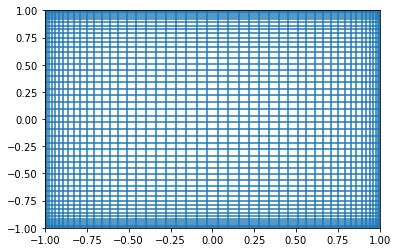

In [7]:
for x in grid:
    plt.axvline(x)
    plt.axhline(x)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [13]:
I_ = np.zeros((N_coeff, N_coeff))

for i in range(N_coeff):
    cat = np.zeros(N_coeff)
    cat[i] = 1
    I_[:, i] = np.polynomial.chebyshev.chebval(grid, cat)

In [15]:
D_ = np.zeros((N_coeff, N_coeff))

for i in range(N_coeff):
    cat = np.zeros(N_coeff)
    cat[i] = 1

    Cheb = np.polynomial.chebyshev.Chebyshev(cat)
    D_[:, i] = Cheb.deriv(m = 1)(grid)


D2_ = np.zeros((N_coeff, N_coeff))

for i in range(N_coeff):
    cat = np.zeros(N_coeff)
    cat[i] = 1

    Cheb = np.polynomial.chebyshev.Chebyshev(cat)
    D2_[:, i] = Cheb.deriv(m = 2)(grid)

## make 2D

In [16]:
I = np.kron(I_, I_)

In [40]:
Dx = np.kron(D_, I_)
Dy = np.kron(I_, D_)

In [60]:
D2x = np.kron(D2_, I_)
D2y = np.kron(I_, D2_)

DxDy = np.kron(D_, D_)

In [63]:
coeff = np.zeros((N_coeff, N_coeff))
coeff[1, 2] = 1
im = (DxDy @ coeff.flatten()).reshape((N_coeff, N_coeff))

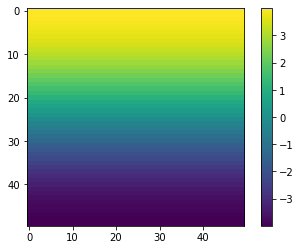

In [67]:
plt.imshow(im.T)
plt.colorbar()

In [105]:
def boundify(op):
    for i in range(N_coeff*N_coeff):
        cond = False

        ## y boundaries
        
        if i % N_coeff == 0:
            cond = True

        if i % N_coeff == N_coeff - 1:
            cond = True


        ## x boundaries

        if i < N_coeff:
            cond = True

        if i >= N_coeff*N_coeff - N_coeff:
            cond = True

        if cond:
            op[i,:] = I[i, :]

    return op

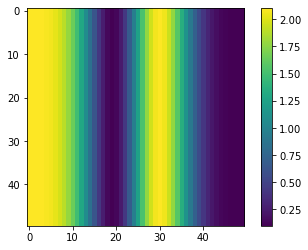

In [279]:
k = -np.sin(yy*1.5*np.pi) + 1.1
plt.imshow(k)
plt.colorbar()
k_cheby = np.linalg.inv(I) @ k.flatten()

k = I @ k_cheby
kx = Dx @ k_cheby
ky = Dy @ k_cheby
k_mat = np.diag(k)
kx_mat = np.diag(kx)
ky_mat = np.diag(ky)

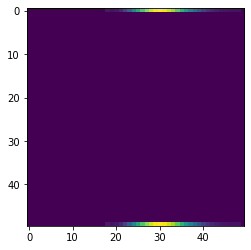

In [289]:
boundary = np.zeros((N_coeff,N_coeff))
boundary[0,:] = k.reshape(dims)[0,:]
boundary[-1, :] = k.reshape(dims)[-1,:]

boundary[0,0:18] = 0
boundary[-1,0:18] = 0
# boundary[:, 0] = np.sin(grid/2 * np.pi)
# boundary[:, -1] = np.sin(grid/2 * np.pi)
boundary[:, 0] = k.reshape(dims)[:,0] * 0
boundary[:, -1] = k.reshape(dims)[0,-1] * 0

plt.imshow(boundary)
boundary = boundary.flatten()

In [290]:
L = boundify(kx_mat @ Dx + ky_mat @ Dy + k_mat @ (D2x + D2y))
sol = np.linalg.inv(L) @ boundary 

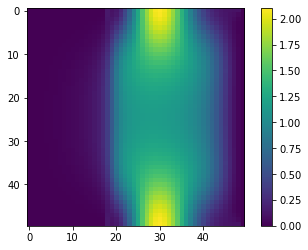

In [291]:
im = I @ sol
plt.imshow(im.reshape(dims))

plt.colorbar()